In [56]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [97]:

class Neural_Network(object):
    def __init__(self):
        # Define Hyperparameters
        # self.inputLayerSize = 2
        # self.outputLayerSize = 1
        # self.hiddenLayerSize = 3
        self.inputLayerSize = 784
        self.outputLayerSize = 10
        self.hiddenLayerSize = 100

        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        # Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        # Apply sigmoid activation function to scalar, vector, or matrix
        return 1 / (1 + np.exp(-z))

    def sigmoidPrime(self, z):
        # Gradient of sigmoid
        return np.exp(-z) / ((1 + np.exp(-z)) ** 2)

    def costFunction(self, X, y):
        # Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5 * sum((y - self.yHat) ** 2)
        return J

    def costFunctionPrime(self, X, y):
        # Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2

    # Helper Functions for interacting with other classes:
    def getParams(self):
        # Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        # Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

class trainer(object):
    def __init__(self, N):
        # Make Local reference to network:
        self.N = N

    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X, y)

        return cost, grad

    def train(self, X, y):
        # Make an internal variable for the callback function:
        self.X = X
        self.y = y

        # Make empty list to store costs:
        self.J = []

        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp': False}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='L-BFGS-B', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [98]:
import numpy as np
import  mnist
x_train, t_train, x_test, t_test = mnist.load()
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [99]:
img0 = np.array(x_train[0])

In [100]:
img0.shape

(784,)

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

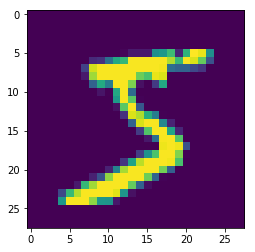

In [102]:
plt.imshow(img0.reshape(28,28))

In [103]:
t_train[0]

5

In [104]:
train_number = 100
X =x_train[0:train_number,:]
y= np.array(t_train[0:train_number])
y=y.reshape((len(y),1))

In [105]:
print(np.array(y).shape)
print(y1.shape)

(100, 1)
(100, 1)


In [106]:
y.reshape(-1,1).shape

(100, 1)

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
enc = OneHotEncoder()

In [109]:
enc.fit(y)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [110]:
t_train[1]

0

In [111]:
onehotY = enc.transform(y).toarray()

print(onehotY)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0.

In [124]:
NN = Neural_Network()

#print('y is ',y[0:10])
yHat=NN.forward(X)
print('yHat before train ',(np.argmax(yHat[0])))
print(yHat)

yHat before train  9
[[9.99989514e-01 5.80010137e-01 3.19343272e-01 7.96034674e-01
  5.04582260e-06 1.30633999e-02 9.82237757e-01 9.76394063e-01
  3.29093292e-01 9.99999990e-01]
 [9.64465749e-01 7.63855980e-01 9.99855162e-01 8.81363361e-01
  3.16189817e-03 8.16639227e-08 9.96679034e-01 9.99990469e-01
  2.99802791e-01 9.03933472e-01]
 [9.94662643e-01 8.07844792e-01 5.61800223e-02 9.16565078e-01
  4.84415728e-01 4.55460503e-03 5.47543548e-01 9.99982997e-01
  2.47044151e-01 9.99997491e-01]
 [9.99982567e-01 9.99338800e-01 9.61510501e-01 9.03136383e-01
  1.37805329e-01 2.12244241e-04 9.99872835e-01 9.99999653e-01
  9.29506267e-01 9.99750087e-01]
 [9.98793064e-01 6.24073143e-01 9.97394566e-01 9.99499613e-01
  1.20278460e-01 1.16401441e-01 9.99984228e-01 9.99952220e-01
  9.84780322e-01 9.99999693e-01]
 [9.99966211e-01 9.95581083e-01 3.92278089e-01 6.68116179e-01
  6.36093096e-01 2.43335275e-03 9.12712595e-01 9.99999387e-01
  6.33155941e-01 9.99999845e-01]
 [9.99957299e-01 9.99849066e-01 9.997

C:\Users\Yasin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


In [125]:
T = trainer(NN)
T.train(X, onehotY)

C:\Users\Yasin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
C:\Users\Yasin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp
C:\Users\Yasin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in square
C:\Users\Yasin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


In [129]:
yHat = np.round(NN.forward(X))
for i in range(10):
    print('yHat after train ',(np.argmax(yHat[i])))

print(yHat)


C:\Users\Yasin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


yHat after train  0
yHat after train  0
yHat after train  0
yHat after train  0
yHat after train  0
yHat after train  0
yHat after train  0
yHat after train  0
yHat after train  0
yHat after train  0
[[1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 